In [1]:
import os
os.chdir('../src/')

In [2]:
from importlib import reload
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from matplotlib import axes
from pandas.plotting import autocorrelation_plot
from sklearn import decomposition, model_selection, svm, linear_model
import math
from finta import TA
import statsmodels
import seaborn as sns

In [3]:
df = pd.read_json('../data/raw/BTC_ETH.json')
df.head()

close                date      high       low       open   quoteVolume  \
0  0.005501 2015-08-08 05:00:00  50.00000  0.005501  50.000000   4333.469000   
1  0.006000 2015-08-08 05:30:00   0.01280  0.005500   0.005501   3642.226628   
2  0.005875 2015-08-08 06:00:00   0.00719  0.005000   0.006900  14607.375725   
3  0.006500 2015-08-08 06:30:00   0.00659  0.005223   0.005425  12520.280800   
4  0.006890 2015-08-08 07:00:00   0.00690  0.005873   0.006340   6799.871349   

      volume  weightedAverage  
0  33.932021         0.007830  
1  21.749825         0.005972  
2  84.009002         0.005751  
3  74.269166         0.005932  
4  44.791872         0.006587

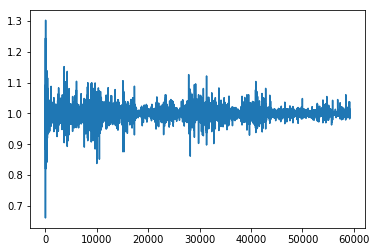

In [52]:
s = df.close / df.close.shift(1)
s.plot()

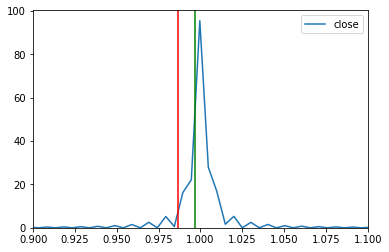

In [51]:
s = df.close / df.close.shift(1)
g = sns.kdeplot(s)
g.set(xlim=(0.9, 1.1))
plt.axvline(s.quantile(0.05), c='red')
plt.axvline(s.quantile(0.25), c='green')

In [56]:
s.sort_values()

5        0.661104
40       0.819770
27       0.828321
10004    0.837826
326      0.842333
10503    0.851734
28182    0.861525
44       0.866693
176      0.875602
15078    0.875780
15323    0.876147
15080    0.877472
16       0.880628
23       0.883002
9671     0.884741
47       0.888889
15141    0.890043
7565     0.890896
4251     0.893102
37       0.895443
31351    0.897690
87       0.901643
32762    0.902344
29796    0.902880
4231     0.904886
3646     0.905295
293      0.907057
225      0.907407
8925     0.907578
52       0.908347
           ...   
29222    1.096047
123      1.096154
15082    1.096480
177      1.097502
205      1.097560
6        1.097726
8919     1.097790
9672     1.099072
9009     1.099723
299      1.099824
8248     1.099941
3822     1.102533
3917     1.102825
168      1.103122
40940    1.103807
6046     1.104469
3        1.106387
15084    1.106482
421      1.115183
266      1.118780
31352    1.121715
27872    1.126102
4244     1.136494
328      1.138426
30       1

What in the actual fuck? We have a day with -33%! This can probably completely destroy our gains! Most of those tail events happened after the exchange opened. What if we only consider later events?

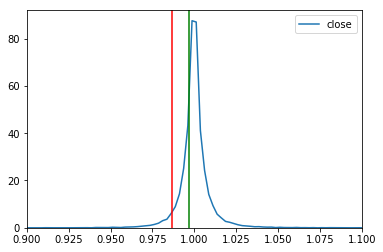

In [59]:
s2 = s[2000:]
g = sns.kdeplot(s2)
g.set(xlim=(0.9, 1.1))
plt.axvline(s2.quantile(0.05), c='red')
plt.axvline(s2.quantile(0.25), c='green')

In [60]:
s2[2000:].sort_values()

10004    0.837826
10503    0.851734
28182    0.861525
15078    0.875780
15323    0.876147
15080    0.877472
9671     0.884741
15141    0.890043
7565     0.890896
4251     0.893102
31351    0.897690
32762    0.902344
29796    0.902880
4231     0.904886
8925     0.907578
4354     0.910721
8237     0.911717
9241     0.911792
4236     0.911932
4240     0.912006
9268     0.913687
9091     0.916280
8238     0.918199
8188     0.919883
15087    0.921475
28983    0.922852
9073     0.923078
10147    0.925268
30725    0.927709
9323     0.928642
           ...   
28158    1.079021
9320     1.080045
4612     1.080756
28990    1.080940
30726    1.081044
9318     1.081283
42851    1.081534
33749    1.082898
10303    1.082943
12209    1.083847
4245     1.085878
8174     1.086180
4204     1.086749
8917     1.086926
4252     1.088482
17315    1.088531
28984    1.093698
8933     1.095772
29222    1.096047
15082    1.096480
8919     1.097790
9672     1.099072
9009     1.099723
8248     1.099941
40940    1

We still have extreme tail events, like 16% losses in a half an hour! Yay, the success of my strategy can drop **heavily** based on one prediction!